In [1]:
from scipy.stats import bootstrap, mannwhitneyu

from hierarchy import *
from glm import *
from benlib.plot import scatter_cc, remove_frames, label_bottom_right
set_publication_figure_defaults()
fig_num = 7

clusters = Clusters(19)
clusters.summarize()

post_spike_bfs = get_spike_history_bfs()
coupling_bfs = get_coupling_bfs()

NR <= 200:
Anaesthetised: ic: 411, mgb: 190, mgbm:  81, ac: 146, total:  828
Awake:         ic: 148, mgb:   0, mgbm:   0, ac:  63, total:  211
Total:         ic: 559, mgb: 190, mgbm:  81, ac: 209, total: 1039

NR > 200:
Anaesthetised: ic:  16, mgb:  27, mgbm:  25, ac:   5, total:   73
Awake:         ic:   1, mgb:   0, mgbm:   0, ac:   2, total:    3
Total:         ic:  17, mgb:  27, mgbm:  25, ac:   7, total:   76



In [2]:
cortex_active_text = 'Cortex active'
cortex_silenced_text = 'Cortex silenced'

In [3]:
# load GLM fits -- expect 542 (of I think 558)

clusters.load_analyses(['glm_fits_main'])
clusters.clusters = [c for c in clusters.clusters if 'glm_fits_main' in c]
print(len(clusters.clusters))

Loading "main GLM fits"
Fieldname: glm_fits_main
/Users/ben/projects/michael-data/hierarchy/results/stim-19/fit_glms_sparse_cvglmnet_all_conditions--n_reps_train=5--n_reps_test=2
Found data files with 542 clusters
** Missing more than 15 results **

542


In [4]:
def cc_test(c, condition, model):
    try:
        return c['glm_fits_main'][condition][model]['cc_test']
    except:
        return np.nan

In [5]:
def get_valid_idx(data):
    lens = [len(d) for d in data]
    if any([l!=lens[0] for l in lens]):
        raise ValueError('Data sets are different lengths')
    invalid_idx = set()
    for d in data:
        invalid_idx.update(set(np.where(np.isnan(d))[0]))
    valid_idx = range(len(data[0]))
    return [v for v in valid_idx if v not in invalid_idx]

ic_clusters = clusters.select_data(brain_area='ic')
stimulus_light_off = np.array([cc_test(x, 'light_off', 'stimulus') for x in ic_clusters])
stimulus_coupling_light_off = np.array([cc_test(x, 'light_off', 'stimulus+coupling') for x in ic_clusters])
stimulus_light_on = np.array([cc_test(x, 'light_on', 'stimulus') for x in ic_clusters])
stimulus_coupling_light_on = np.array([cc_test(x, 'light_on', 'stimulus+coupling') for x in ic_clusters])


v_ic = get_valid_idx([stimulus_light_off, stimulus_coupling_light_off, 
                   stimulus_light_on, stimulus_coupling_light_on])

mannwhitneyu(stimulus_light_off[v_ic], stimulus_coupling_light_off[v_ic])

MannwhitneyuResult(statistic=38695.5, pvalue=7.110513300661436e-09)

In [6]:
mannwhitneyu(stimulus_light_on[v_ic], stimulus_coupling_light_on[v_ic])

MannwhitneyuResult(statistic=42402.5, pvalue=2.3108553772903598e-05)

In [7]:
mgb_clusters = clusters.select_data(brain_area='mgb')
stimulus_light_off = np.array([cc_test(x, 'light_off', 'stimulus') for x in mgb_clusters])
stimulus_coupling_light_off = np.array([cc_test(x, 'light_off', 'stimulus+coupling') for x in mgb_clusters])
stimulus_light_on = np.array([cc_test(x, 'light_on', 'stimulus') for x in mgb_clusters])
stimulus_coupling_light_on = np.array([cc_test(x, 'light_on', 'stimulus+coupling') for x in mgb_clusters])


v_mgb = get_valid_idx([stimulus_light_off, stimulus_coupling_light_off, 
                   stimulus_light_on, stimulus_coupling_light_on])

mannwhitneyu(stimulus_light_off[v_mgb], stimulus_coupling_light_off[v_mgb])

MannwhitneyuResult(statistic=3409.0, pvalue=2.8479818961209966e-36)

In [8]:
mannwhitneyu(stimulus_light_on[v_mgb], stimulus_coupling_light_on[v_mgb])

MannwhitneyuResult(statistic=6943.5, pvalue=9.408402754176696e-19)

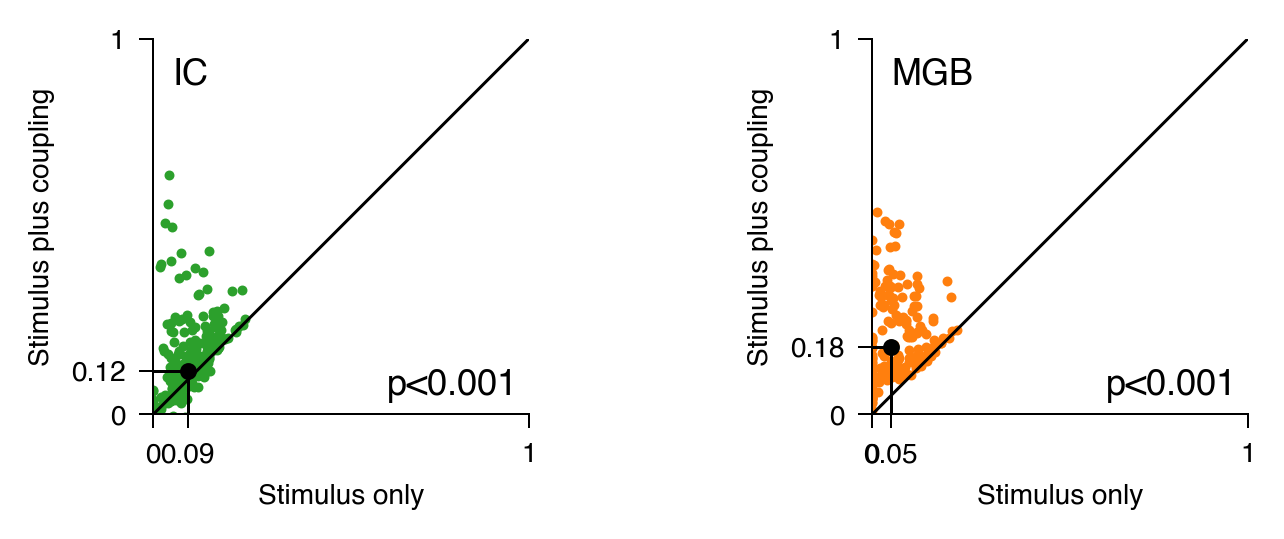

In [9]:
# stimulus+coupling model beats stimulus only
fig = plt.figure(figsize=(15/2.54,4.3/2.54))
plot_by_brain_area(clusters, ['ic', 'mgb'],
# plot_by_brain_area_by_state(clusters, ['ic', 'mgb'],
                   select_params={},
                   x_func=lambda x: cc_test(x, 'light_off', 'stimulus'),
                   y_func=lambda x: cc_test(x, 'light_off', 'stimulus+coupling'),
                   x_label='Stimulus only',
                   y_label='Stimulus plus coupling',
#                    plot_central_tendency=True,
#                    central_tendency=np.nanmedian,
                   p_value=True,
#                    xlim=[0,0.7], ylim=[0,0.7],
                   panel_labels=False)

# ax = plt.gca()
# leg1 = ax.legend(['Light off', 'Light on'], loc='lower right')
# leg1.legendHandles[0].set_color('k')
# leg1.legendHandles[1].set_color('k')

ax = plt.gcf().axes[1]
ax.set_ylabel('Stimulus plus coupling')

plt.savefig('figure-%d-scatter-light-off.pdf' % fig_num)

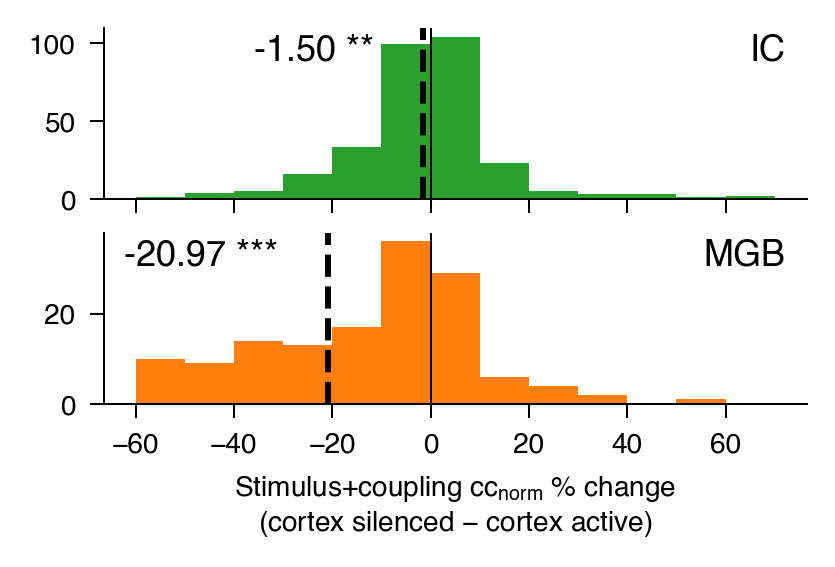

In [10]:
# in MGB, coupling helps more when the light is off --- FLIPPED x-axis
fig = plt.figure(figsize=(8/2.54,4.3/2.54))
x_mn = -60
x_mx = 80
hist_by_brain_area(clusters, ['ic', 'mgb'],
                   select_params={},
                   val_func=lambda x: 100 * (cc_test(x, 'light_on', 'stimulus+coupling') - \
                                      cc_test(x, 'light_off', 'stimulus+coupling')) / \
                                      cc_test(x, 'light_on', 'stimulus+coupling'),
                   x_label='Stimulus+coupling $cc_{norm}$ % change\n(cortex silenced $-$ cortex active)',
                   plot_central_tendency=True,
                   central_tendency_alignment='right',
                   bins=np.arange(x_mn,x_mx,10),
                   central_tendency_margin=10,
                   label_in_top_right=True,
                  )

# currently plotting as % of light off
plt.savefig('figure-%d-cc_histogram.pdf' % fig_num)

In [11]:
ic_clusters = clusters.select_data(brain_area='ic')
vals_ic = [100 * (cc_test(x, 'light_off', 'stimulus+coupling') - \
            cc_test(x, 'light_on', 'stimulus+coupling')) / \
            cc_test(x, 'light_off', 'stimulus+coupling') for x in ic_clusters]

mgb_clusters = clusters.select_data(brain_area='mgb')
vals_mgb = [100 * (cc_test(x, 'light_off', 'stimulus+coupling') - \
            cc_test(x, 'light_on', 'stimulus+coupling')) / \
            cc_test(x, 'light_off', 'stimulus+coupling') for x in mgb_clusters]

vals_ic = [v for v in vals_ic if np.isfinite(v)]
vals_mgb = [v for v in vals_mgb if np.isfinite(v)]

mannwhitneyu(vals_ic, vals_mgb)

MannwhitneyuResult(statistic=20672.5, pvalue=2.8111978679451985e-13)

In [12]:
# unpack kernels

fit_type = 'best_fit'
# fit_type = 'compromise_lambda'


if fit_type == 'compromise_lambda':
    print('Using compromise lambda values')
else:
    print('Using best-fit lambda')

for c in clusters.clusters:
    if 'glm_fits_main' not in c:
        c['glm_cc_test_gt_thresh'] = False
        continue

    for key_idx, key in enumerate(['light_off', 'light_on']):
        
        for kernel_type in ['stimulus', 'stimulus+spike_history', 
                        'stimulus+coupling', 'stimulus+spike_history+coupling']:

            data = c['glm_fits_main'][key][kernel_type]
            data['cc_test']

            if fit_type=='compromise_lambda':
                coeffs = data['compromise_lambda']['coeffs']
                coeffs = coeffs[1:] # drop constant term
            else:
                best_fit = np.where(data['cvfit']['lambdau']==\
                                    data['cvfit']['lambda_min'])[0][0]
                coeffs = data['cvfit']['glmnet_fit']['beta'][:,best_fit].squeeze()

            kernels = unpack_kernel(coeffs, kernel_type,
                                    post_spike_bfs=post_spike_bfs,
                                    coupling_bfs=coupling_bfs)

            c['glm_fits_main'][key][kernel_type]['kernels'] = kernels
            
            # select clusters where cc_test for the stimulus model is >0.05, and 
            # cc_test for the stimulus+coupling model is higher than for stimulus alone
            c['glm_cc_test_gt_thresh'] = c['glm_fits_main']['light_off']['stimulus']['cc_test']>0 and \
                                         (c['glm_fits_main']['light_off']['stimulus+coupling']['cc_test'] - \
                                          c['glm_fits_main']['light_off']['stimulus']['cc_test'])>0

select_params = {'glm_cc_test_gt_thresh':True}

Using best-fit lambda


In [13]:
print(len(clusters.clusters))
n_ic = len(clusters.select_data(brain_area='ic'))
n_ic_sel = len(clusters.select_data(brain_area='ic', **select_params))

n_mgb = len(clusters.select_data(brain_area='mgb'))
n_mgb_sel = len(clusters.select_data(brain_area='mgb', **select_params))

print('selected %d of %d IC units' % (n_ic_sel, n_ic))
print('selected %d of %d MGB units' % (n_mgb_sel, n_mgb))


542
selected 272 of 339 IC units
selected 152 of 203 MGB units


In [14]:
# exc/inh balance over time
def inh_exc_over_time(c, light_condition, overall_kernel_type, kernel_type):
    try:
        # drop first bin which is zero for both + and -
        a = np.sum(np.maximum(c['glm_fits_main'][light_condition][overall_kernel_type]\
                                 ['kernels'][kernel_type], 0), axis=0)[1:]
        b = -np.sum(np.minimum(c['glm_fits_main'][light_condition][overall_kernel_type]\
                                 ['kernels'][kernel_type], 0), axis=0)[1:]
        
        return (a-b)/(a+b)
    except:
        return np.nan 
    
def exc_over_time(c, light_condition, overall_kernel_type, kernel_type):
    try:
        a = np.sum(np.maximum(c['glm_fits_main'][light_condition][overall_kernel_type]\
                                 ['kernels'][kernel_type], 0), axis=0)
        b = np.sqrt(np.sum(np.square(c['glm_fits_main'][light_condition][overall_kernel_type]\
                                 ['kernels'][kernel_type])))
        return a/b
    except:
        return np.nan 
    
def inh_over_time(c, light_condition, overall_kernel_type, kernel_type):
    try:
        a = -np.sum(np.minimum(c['glm_fits_main'][light_condition][overall_kernel_type]\
                                 ['kernels'][kernel_type], 0), axis=0)
        b = np.sqrt(np.sum(np.square(c['glm_fits_main'][light_condition][overall_kernel_type]\
                                 ['kernels'][kernel_type])))
        return a/b
    except:
        return np.nan

In [15]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

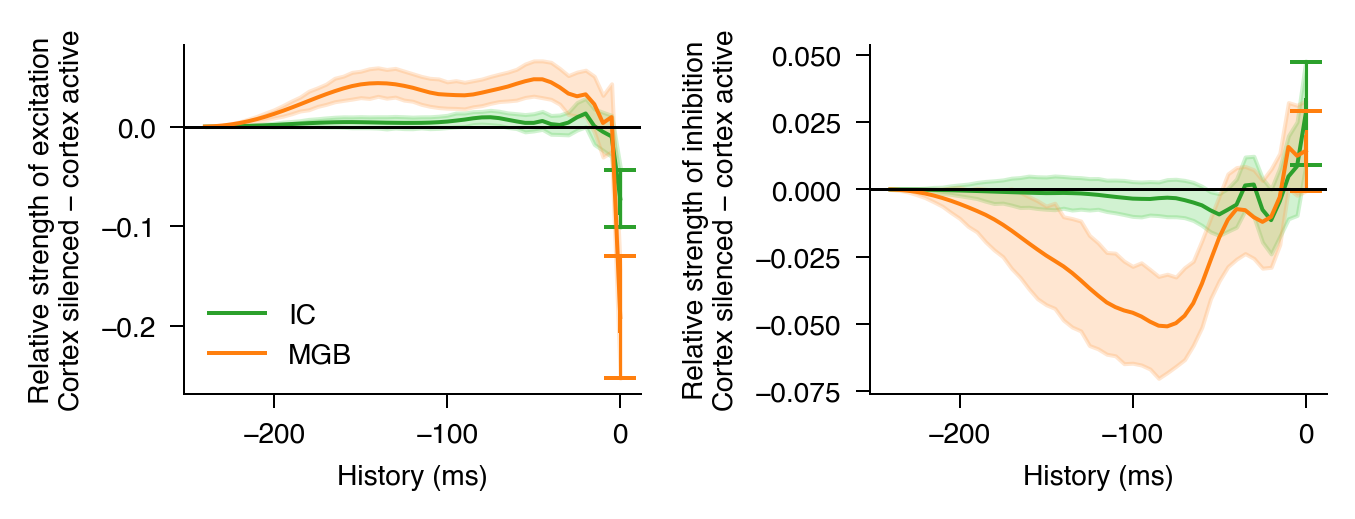

In [16]:
# paired -- best analysis so far, I think -- FLIPPED y-axis
plt.figure(figsize=(13/2.54,4/2.54))
plt.subplot(1,2,1)

t = np.arange(0, -49*5, -5)

for brain_area in ['ic', 'mgb']:
    sel = clusters.select_data(brain_area=brain_area, **select_params)
    color = BRAIN_AREA_COLORS[brain_area]

    off = [exc_over_time(c, 'light_off', 'stimulus+coupling', 'coupling')[1:] for c in sel]
    on = [exc_over_time(c, 'light_on', 'stimulus+coupling', 'coupling')[1:] for c in sel]

    diff = np.vstack(on) - np.vstack(off)
    boot = [bootstrap((d,), np.nanmean, n_resamples=1000) for d in diff.T]
    ci_low = [b.confidence_interval.low for b in boot]
    ci_hi = [b.confidence_interval.high for b in boot]
    
    mn = np.mean(diff, axis=0)
    a = plt.plot(t, mn, c=color, lw=1)
    plt.fill_between(t, ci_low, ci_hi, color=lighten_color(color,.75), alpha=.25, label='_nolegend_')
    plt.errorbar(t[0], mn[0], (ci_low-mn)[0], (ci_hi-mn)[0], label='_nolegend_', color=color, capsize=4)

plt.legend(['IC', 'MGB'], frameon=False)
plt.axhline(0, c='k')
plt.xlabel('History (ms)')
plt.ylabel('Relative strength of excitation\nCortex silenced $-$ cortex active')

plt.subplot(1,2,2)
for brain_area in ['ic', 'mgb']:
    sel = clusters.select_data(brain_area=brain_area, **select_params)
    color = BRAIN_AREA_COLORS[brain_area]

    off = [inh_over_time(c, 'light_off', 'stimulus+coupling', 'coupling')[1:] for c in sel]
    on = [inh_over_time(c, 'light_on', 'stimulus+coupling', 'coupling')[1:] for c in sel]

    diff = np.vstack(on) - np.vstack(off)
    boot = [bootstrap((d,), np.nanmean, n_resamples=1000) for d in diff.T]
    ci_low = [b.confidence_interval.low for b in boot]
    ci_hi = [b.confidence_interval.high for b in boot]
    
    mn = np.mean(diff, axis=0)
    a = plt.plot(t, np.mean(diff, axis=0), c=color, lw=1)
    plt.fill_between(t, ci_low, ci_hi, color=lighten_color(color,.75), alpha=.25, label='_nolegend_')
    plt.errorbar(t[0], mn[0], (ci_low-mn)[0], (ci_hi-mn)[0], label='_nolegend_', color=color, capsize=4)

plt.axhline(0, c='k')
plt.xlabel('History (ms)')
plt.ylabel('Relative strength of inhibition\nCortex silenced $-$ cortex active')

remove_frames(plt.gcf())
plt.subplots_adjust(wspace=.5)

plt.savefig('figure-%d-exc-inh-over-time.pdf' % fig_num)

/Users/ben/.mambaforge/lib/python3.9/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/ben/.mambaforge/lib/python3.9/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


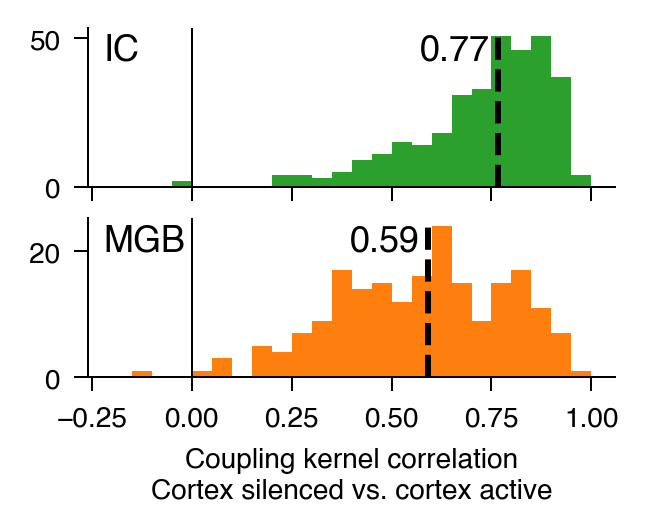

In [17]:
plt.figure(figsize=(6/2.54,4/2.54))

def kernel_correlation(c, overall_kernel_type, kernel_type):
    k1 = c['glm_fits_main']['light_off'][overall_kernel_type]['kernels'][kernel_type].ravel()
    k2 = c['glm_fits_main']['light_on'][overall_kernel_type]['kernels'][kernel_type].ravel()
    
    return np.corrcoef(k1, k2)[0,1]

x_mn = -.2
x_mx = 1.01
hist_by_brain_area(clusters, ['ic', 'mgb'],
                   select_params={},
                   val_func=lambda x: kernel_correlation(x, 'stimulus+coupling', 'coupling'),
                   x_label='Coupling kernel correlation\nCortex silenced vs. cortex active',
                   plot_central_tendency=True,
                   central_tendency_alignment='right',
                   show_significance=False,
                   bins=np.arange(x_mn,x_mx,.05)
                  )

plt.savefig('figure-%d-kernel-correlation.pdf' % fig_num)